# Hackathon Dotz

##### Classificar as observações por (CATEGORIA | SUB-CATEGORIA)

In [2]:
# Importação dos pacotes para Analise

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sct
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Importando pacotes para treino e validação do modelo

from sklearn.feature_extraction.text import TfidfVectorizer
# um classificador linear que utiliza o Gradiente Descendente Estocástico como método de treino. 
# Por padrão, utiliza o estimador SVM.
from sklearn.linear_model import SGDClassifier
# Uma rede neural Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [0]:
%matplotlib inline

In [0]:
# Importação dos dataset

df = pd.read_csv('Hackathon_Base_Treino_comdep.csv')
df2 = pd.read_csv('Hackathon_Base_Teste.csv')


#### Classificando

In [0]:
# Criando a nova para classificar CATEGORIA

base = df

# Selecionando apenas o item a ser classificado e o target

base_data = base['DESCRIÇÃO PARCEIRO']
base_target = base['CATEGORIA']+'-'+base['SUB-CATEGORIA']

In [0]:
# Transformando a descrição em vetor

vetor = TfidfVectorizer()
vetor_x = vetor.fit_transform(base_data)


In [0]:
# Dividindo dataset em treino e teste

x_train, x_test, y_train, y_test = train_test_split(vetor_x, base_target, test_size=0.2, random_state=27)


In [10]:
# Aqui nós treinamos o classificador

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True, max_iter=500)
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(70,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [12]:
# Avaliando a performance com predição

predicted = clf.predict(x_test)

print('\n###Indicadores Classificação Categoria###\n')
print(metrics.classification_report(y_test, predicted))

# Matriz de confusão
print('\n### Matriz de Confusão Categoria###\n')
print(metrics.confusion_matrix(y_test, predicted))


###Indicadores Classificação Categoria###

                                                            precision    recall  f1-score   support

                               ABSORVENTE-EXTERNO COM ABAS       0.57      0.50      0.53         8
                                ABSORVENTE-EXTERNO NOTURNO       1.00      1.00      1.00         2
                        ABSORVENTE-EXTERNO PROTETOR DIÁRIO       1.00      0.67      0.80         3
                               ABSORVENTE-EXTERNO SEM ABAS       0.00      0.00      0.00         3
                                   ABSORVENTE-INTERNO MINI       0.00      0.00      0.00         1
                                  ABSORVENTE-INTERNO MÉDIO       0.00      0.00      0.00         0
                         ACESSÓRIOS DE BANHO-BUCHA VEGETAL       1.00      1.00      1.00         1
                      ACESSÓRIOS DE BANHO-ESPONJA DE BANHO       1.00      0.57      0.73         7
                             ACESSÓRIOS DE BANHO-KIT BA

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


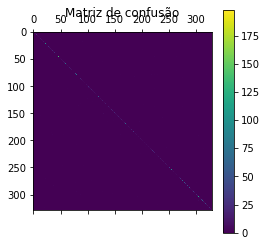

In [0]:
# Analise Gráfica da matriz de confusão

plt.matshow(metrics.confusion_matrix(y_test, predicted))
plt.title("Matriz de confusão")
plt.colorbar()
plt.show()

In [0]:
# Predição em novos dados

base_novos = df2['DESCRIÇÃO PARCEIRO']

# Tranformando descrição em vetor
vetor_n = vetor.transform(base_novos)

#Previsão dos novos dados
predicted_novos = clf.predict(vetor_n)


In [0]:
# Adicionando a coluna
df_cat_sub = df2[['DESCRIÇÃO PARCEIRO']]
df_cat_sub['CATEGORIA | SUB-CATEGORIA'] = predicted_novos

In [22]:
# Novos Dados de teste incluindo o departamento
df_cat_sub.head(5)

,DESCRIÇÃO PARCEIRO,CATEGOTIA | SUB-CATEGORIA
0,SAL ROSA HIMALAIA C/ ALHO 500G,SAL-SAL DO HIMALAIA
1,JG BOLA NATAL ACASA C/17 DR/PR/BC R952,ENFEITES DE NATAL-ENFEITES DE ÁRVORE DE NATAL
2,MIST PREP LIQ CHA VDE LINEA 56ML-CX LIMAO,FARINÁCEO-MISTURAS
3,ALICATE CUT+ESPAT MUNDIAL SANDY AMARELO,MAQUIAGEM-SOMBRA
4,MEIA PIZZA PEPPERONI UN,PIZZA-MARGUERITA


### Referências

https://medium.com/luisfredgs/classificando-textos-com-machine-learning-e054ca7bf4e0

https://www.alura.com.br/artigos/classificando-textos-com-python